In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print(df.dtypes)
print(df.shape)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
(891, 12)


In [20]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

In [21]:
features = ['Survived', 'Pclass', 'Fare', 'Age', 'Parch', 'SibSp']

filtered = df.loc[df['Age'] > 0, features]
filtered['Sex'] = (df['Sex'] == 'male').astype(int)
x = StandardScaler().fit_transform(filtered.values[:,1:])
print(x)
print(x[np.isnan(x)].shape)

[[ 0.91123237 -0.51897787 -0.53037664 -0.50589515  0.52457013  0.75905134]
 [-1.47636364  0.69189675  0.57183099 -0.50589515  0.52457013 -1.31743394]
 [ 0.91123237 -0.50621356 -0.25482473 -0.50589515 -0.55170307 -1.31743394]
 ...
 [-1.47636364 -0.08877362 -0.73704057 -0.50589515 -0.55170307 -1.31743394]
 [-1.47636364 -0.08877362 -0.25482473 -0.50589515 -0.55170307  0.75905134]
 [ 0.91123237 -0.50952283  0.15850313 -0.50589515 -0.55170307  0.75905134]]
(0,)


In [22]:
pca = PCA()
pca.fit_transform(x)
bar_height = pca.explained_variance_ratio_
print(bar_height)
np.sum(bar_height)

[0.29727575 0.28932054 0.14478671 0.1151414  0.09394601 0.05952959]


1.0

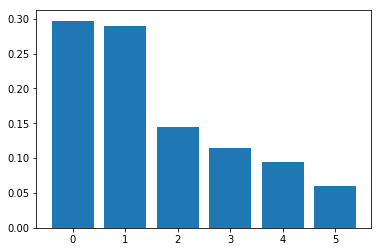

In [23]:
plt.bar(np.arange(6), bar_height)
plt.show()

In [24]:
comp = pca.fit_transform(x)
comp_df = pd.DataFrame(data = comp)

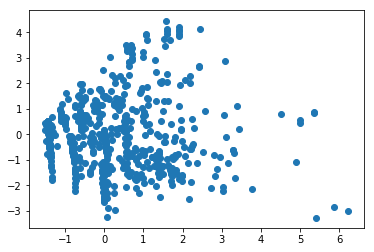

In [27]:
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1])

In [37]:
colors = []

for entry in filtered[['Survived', 'Sex']].values:
    if entry[0] == 0 and entry[1] == 0:
        colors.append('red')
    elif entry[0] == 0 and entry[1] == 1:
        colors.append('pink')
    elif entry[0] == 1 and entry[1] == 0:
        colors.append('green')
    else:
        colors.append('springgreen')
        
len(colors)

714

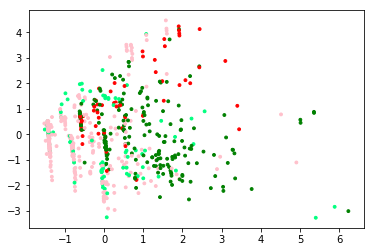

In [38]:
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], c=colors, s=8)

In [39]:
kpca = KernelPCA(kernel="rbf", n_components=2, gamma=0.06)
comp2 = kpca.fit_transform(x)
comp_df2 = pd.DataFrame(data=comp2, columns=['pc1', 'pc2'])
comp_df2.head()

,pc1,pc2
0,-0.344854,0.147240
1,0.506835,-0.176439
2,-0.083847,0.246665
3,0.466658,-0.139821
4,-0.401632,-0.093795


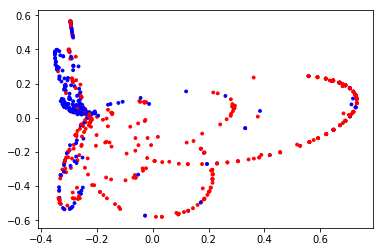

In [40]:
kpca = KernelPCA(kernel="rbf", gamma=0.56)
comp2 = kpca.fit_transform(x)
comp_df2 = pd.DataFrame(data=comp2)
colors = ['red' if saved == 0 else 'blue' for saved in filtered['Survived']]
plt.scatter(comp_df2[0], comp_df2[1], c=colors, s=8)

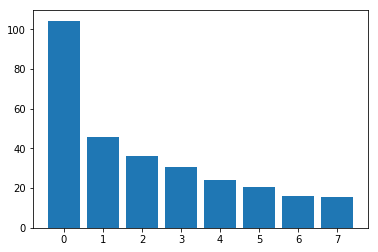

In [41]:
trim = 8
bar_height = kpca.lambdas_

plt.bar(np.arange(trim), bar_height[:trim])
plt.show()